In [888]:
import pandas as pd
import numpy as np

In [889]:
df = pd.read_csv('../data/taxi_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [890]:
df.describe(include='object')

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
count,950,950,950,950
unique,4,2,3,3
top,Afternoon,Weekday,Low,Clear
freq,371,655,397,667


In [891]:
df.shape

(1000, 11)

## Data cleaning

In [892]:
# Replace missing numerical values with mean or mode
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].mean())
df['Passenger_Count'] = df['Passenger_Count'].fillna(df['Passenger_Count'].mode()[0])
df['Base_Fare'] = df['Base_Fare'].fillna(df['Base_Fare'].mean())
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean())
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean())
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean())
df['Trip_Price'] = df['Trip_Price'].fillna(df['Trip_Price'].mean())

In [893]:
df.isna().sum()

Trip_Distance_km          0
Time_of_Day              50
Day_of_Week              50
Passenger_Count           0
Traffic_Conditions       50
Weather                  50
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64

In [894]:
# Replacing missing categorical values with mode
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])
df['Traffic_Conditions'] = df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0])
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

In [895]:
df.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [896]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000


In [897]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.070547,2.503000,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.400775,1.080351,0.848107,0.418922,0.112662,31.339413,39.464810
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.107500,2.000000,2.770000,0.870000,0.197500,37.107500,34.578850
50%,26.995000,3.000000,3.502989,1.233316,0.292916,62.118116,52.617000
75%,37.782500,3.000000,4.202500,1.580000,0.382500,87.775000,67.476650
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [898]:
# Get the unique values in categorical columns
print("Unique values in 'Time_of_Day':", df['Time_of_Day'].unique())
print("Unique values in 'Day_of_Week':", df['Day_of_Week'].unique())
print("Unique values in 'Traffic_Conditions':", df['Traffic_Conditions'].unique())
print("Unique values in 'Weather':", df['Weather'].unique())

Unique values in 'Time_of_Day': ['Morning' 'Afternoon' 'Evening' 'Night']
Unique values in 'Day_of_Week': ['Weekday' 'Weekend']
Unique values in 'Traffic_Conditions': ['Low' 'High' 'Medium']
Unique values in 'Weather': ['Clear' 'Rain' 'Snow']


## Feature engineering

In [899]:
# CATEGORICAL ENCODING
# Time of the day encoding
time_map = {'Morning': 0,'Afternoon': 1,'Evening': 2,'Night': 3}
df['Time_Num'] = df['Time_of_Day'].map(time_map)

#Cyclical encoding:Night and Morning are close in time
df['Day_Sin'] = np.sin(2 * np.pi * df['Time_Num'] / 4)
df['Day_Cos'] = np.cos(2 * np.pi * df['Time_Num'] / 4)

In [900]:
# Binary encoding for Day_of_Week
df['Is_Weekend'] = df['Day_of_Week'].map({'Weekday': 0, 'Weekend': 1})

In [901]:
# Encoding ordinal traffic conditions
traffic_map = {'Low':0, 'Medium':1, 'High':2}
df['Traffic_Level'] = df['Traffic_Conditions'].map(traffic_map)

In [902]:
# Encoding nominal weather conditions using one-hot encoding
df = pd.get_dummies(df, columns=['Weather'])

In [903]:
df['Weather_Clear'] = df['Weather_Clear'].astype(int)
df['Weather_Rain'] = df['Weather_Rain'].astype(int)
df['Weather_Snow'] = df['Weather_Snow'].astype(int)

In [904]:
df.tail(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_Num,Day_Sin,Day_Cos,Is_Weekend,Traffic_Level,Weather_Clear,Weather_Rain,Weather_Snow
990,40.170000,Evening,Weekday,3.0,Low,3.81,0.660000,0.420000,62.66,56.639400,2,1.224647e-16,-1.000000e+00,0,0,1,0,0
991,35.040000,Morning,Weekend,4.0,Medium,2.90,1.100000,0.150000,9.99,56.874773,0,0.000000e+00,1.000000e+00,1,1,0,1,0
992,14.340000,Afternoon,Weekday,1.0,Medium,3.23,1.010000,0.290000,45.07,30.783700,1,1.000000e+00,6.123234e-17,0,1,1,0,0
993,27.070547,Morning,Weekday,3.0,Medium,2.65,1.350000,0.292916,25.61,55.334800,0,0.000000e+00,1.000000e+00,0,1,1,0,0
994,18.690000,Evening,Weekday,3.0,Medium,4.90,1.790000,0.170000,79.41,51.854800,2,1.224647e-16,-1.000000e+00,0,1,1,0,0
995,5.490000,Afternoon,Weekend,4.0,Medium,2.39,0.620000,0.490000,58.39,34.404900,1,1.000000e+00,6.123234e-17,1,1,1,0,0
996,45.950000,Night,Weekday,4.0,Medium,3.12,0.610000,0.292916,61.96,62.129500,3,-1.000000e+00,-1.836970e-16,0,1,1,0,0
997,7.700000,Morning,Weekday,3.0,Low,2.08,1.780000,0.292916,54.18,33.123600,0,0.000000e+00,1.000000e+00,0,0,0,1,0
998,47.560000,Morning,Weekday,1.0,Low,2.67,0.820000,0.170000,114.94,61.209000,0,0.000000e+00,1.000000e+00,0,0,1,0,0
999,22.850000,Morning,Weekend,3.0,Medium,4.34,1.233316,0.230000,29.69,45.443700,0,0.000000e+00,1.000000e+00,1,1,1,0,0


In [905]:
#NUMERICAL FEATURES SCALING
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
df[num_features] = scaler.fit_transform(df[num_features])
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_Num,Day_Sin,Day_Cos,Is_Weekend,Traffic_Level,Weather_Clear,Weather_Rain,Weather_Snow
0,-3.981496e-01,Morning,Weekday,0.460266,Low,0.067255,-1.034878,0.240523,-0.264915,36.262400,0,0.000000e+00,1.000000e+00,0,0,1,0,0
1,1.058191e+00,Afternoon,Weekday,-1.391911,High,0.000000,-1.464767,1.217383,-0.687916,56.874773,1,1.000000e+00,6.123234e-17,0,2,1,0,0
2,5.053590e-01,Evening,Weekend,-1.391911,High,-0.947276,-0.055685,-1.269171,-0.793268,52.903200,2,1.224647e-16,-1.000000e+00,1,2,1,0,0
3,1.680904e-01,Evening,Weekday,1.386354,Low,-0.027120,-1.727477,-1.269171,1.746020,36.469800,2,1.224647e-16,-1.000000e+00,0,0,1,0,0
4,1.832139e-16,Evening,Weekday,0.460266,High,-0.675948,-1.440884,0.240523,-1.260326,15.618000,2,1.224647e-16,-1.000000e+00,0,2,1,0,0


In [906]:
#Drop original categorical columns
df = df.drop(columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions','Time_Num'])
df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Day_Sin,Day_Cos,Is_Weekend,Traffic_Level,Weather_Clear,Weather_Rain,Weather_Snow
0,-3.981496e-01,0.460266,0.067255,-1.034878,0.240523,-0.264915,36.262400,0.000000e+00,1.000000e+00,0,0,1,0,0
1,1.058191e+00,-1.391911,0.000000,-1.464767,1.217383,-0.687916,56.874773,1.000000e+00,6.123234e-17,0,2,1,0,0
2,5.053590e-01,-1.391911,-0.947276,-0.055685,-1.269171,-0.793268,52.903200,1.224647e-16,-1.000000e+00,1,2,1,0,0
3,1.680904e-01,1.386354,-0.027120,-1.727477,-1.269171,1.746020,36.469800,1.224647e-16,-1.000000e+00,0,0,1,0,0
4,1.832139e-16,0.460266,-0.675948,-1.440884,0.240523,-1.260326,15.618000,1.224647e-16,-1.000000e+00,0,2,1,0,0


In [907]:
#Check correlation
import seaborn as sns
import matplotlib.pyplot as plt

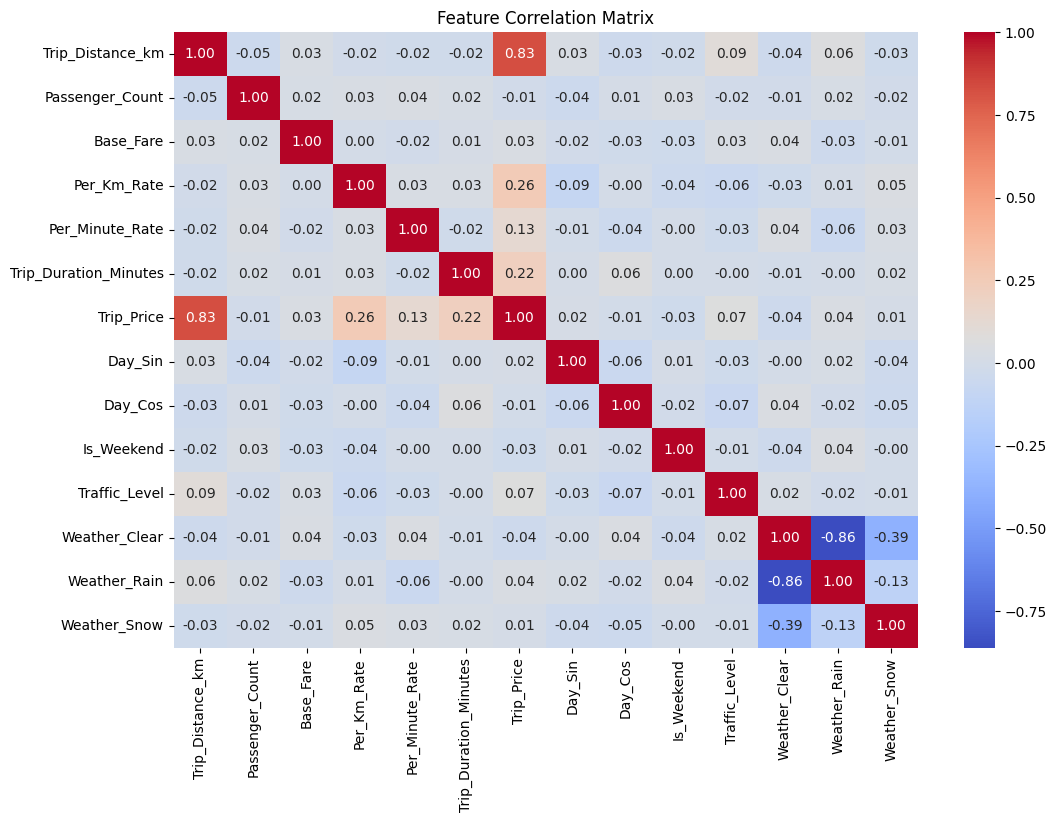

In [908]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Model Training

In [909]:
from sklearn.model_selection import train_test_split

In [910]:
X = df.drop(columns=['Trip_Price'])
y = df['Trip_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [911]:
X.tail()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Day_Sin,Day_Cos,Is_Weekend,Traffic_Level,Weather_Clear,Weather_Rain,Weather_Snow
995,-1.112911,1.386354,-1.312979,-1.464767e+00,1.750217,-0.119019,1.0,6.123234e-17,1,1,1,0,0
996,0.973616,1.386354,-0.451808,-1.488650e+00,0.000000,-0.005048,-1.0,-1.836970e-16,0,1,1,0,0
997,-0.998941,0.460266,-1.678682,1.305633e+00,0.000000,-0.253422,0.0,1.000000e+00,0,0,0,1,0
998,1.056644,-1.391911,-0.982667,-9.871120e-01,-1.091560,1.686321,0.0,1.000000e+00,0,0,1,0,0
999,-0.217654,0.460266,0.987410,5.303037e-16,-0.558727,-1.035257,0.0,1.000000e+00,1,1,1,0,0


In [912]:
def getInputFeatures(distance: float, passengers: float, base_fare: float, per_km: float, per_minute: float, duration: float, time_of_day: str, day_of_week: str, traffic: str, weather: str) -> np.array:
    # Scale numerical features
    num_features = np.array([[distance, passengers, base_fare, per_km, per_minute, duration]])
    num_features_scaled = scaler.transform(num_features)

    # Encode categorical features
    time_map = {'Morning': 0,'Afternoon': 1,'Evening': 2,'Night': 3}
    time_num = time_map[time_of_day]
    day_sin = np.sin(2 * np.pi * time_num / 4)
    day_cos = np.cos(2 * np.pi * time_num / 4)

    is_weekend = 1 if day_of_week == 'Weekend' else 0

    traffic_map = {'Low':0, 'Medium':1, 'High':2}
    traffic_level = traffic_map[traffic]

    weather_clear = 1 if weather == 'Clear' else 0
    weather_rain = 1 if weather == 'Rain' else 0
    weather_snow = 1 if weather == 'Snow' else 0

    # Combine all features into a single array
    input_features = np.hstack((num_features_scaled[0], day_sin, day_cos, is_weekend, traffic_level, weather_clear, weather_rain, weather_snow))
    
    return input_features

In [913]:
getInputFeatures(19.35, 3.0, 3.56, 0.80, 0.32, 53.82, 'Morning', 'Weekday', 'Low', 'Clear')

/home/josh/Projects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-0.39814955,  0.46026589,  0.06725458, -1.03487754,  0.24052275,
       -0.2649146 ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ])

In [914]:
# Check using linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [915]:
from sklearn.metrics import mean_squared_error, r2_score

In [916]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 195.8265451019087
R^2 Score: 0.7641678400238419


In [917]:
# Check using decision tree regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [918]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 59.910052387626784
R^2 Score: 0.9278508587714388


In [919]:
test_trip = np.array([[1.056644,-1.391911,-0.982667,-9.871120e-01,-1.091560,1.686321,0.0,1.000000e+00,0,0,1,0,0]])
rf_prediction = model.predict(test_trip)
print(f'Prediction is {rf_prediction} while expected is 61.209000')

Prediction is [61.64879991] while expected is 61.209000


/home/josh/Projects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [920]:
# Get predictions from user typical input from API
rf_prediction = model.predict(np.array([getInputFeatures(19.35, 3.0, 3.56, 0.80, 0.32, 53.82, 'Morning', 'Weekday', 'Low', 'Clear')]))
print(f'Prediction is {rf_prediction} while expected is 36.2624')

Prediction is [36.33410989] while expected is 36.2624


/home/josh/Projects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/josh/Projects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [921]:
# With boosting
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 69.15927596780689
R^2 Score: 0.9167121013885664


In [922]:
-3.981496e-01

-0.3981496